# Figure 2: Hammett Plot for pH = 11.5 ($\log{k_{H^+}}$ vs $\sigma$)

This workbook imports the data set of kinetic parameters for the rearrangement described in the paper below. It then generates a Hammett plot for the reaction indicated in the title.

The data being pklotted is from 'On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

The libraries are imported and any functions defined

In [1]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar



github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
github_location = "./data/"    ### Use when working file is being stored locally
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_location_styles = "/Users/blink/github/LFER-QSAR/styles/"
github_location_LFER_tables = "/Users/blink/github/LFER-QSAR/data/"
result_file_name = "Table1data.csv"

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- 
#################################################################
def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

###############################################################
### a function to report the results from a linear regression
###############################################################

def Report(comment, linefit):
    print(comment)
    print(f"slope = {linefit.slope:-.3f} +/- {linefit.stderr:.3f}")
    print(f"intercept = {linefit.intercept:-.3f} +/- {linefit.intercept_stderr:.3f}")
    print(f"rsq = {(linefit.rvalue)**2:-.3}")
    print(f"p = {(linefit.pvalue):-.3}")
    print("")



## Read Data and Make Result DataFrame

We now have a data set of kinetic parameters and substituent parameters.  We can plot the log of the rate constants *vs* the Hammett $\sigma$ values and draw conclusion based on the results.First we will combine the data from the paper with the database of hammett parameters and create a dataframe caleed 'result'

We will use this data set in all subsequent plots and analyses.

In [2]:
################################################################################
### Load in data file
################################################################################

Filename = github_location + result_file_name        

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)

################################################################################
################################################################################
################################################################################



################################################################################
### Read Hammett data set. The fields are separated by commas; comments are enabled  
################################################################################

LFER_Data = "LFER_HanschLeoTaft.csv"   # Choose which set of Hammett parameters you prefer
#LFER_Data = "LFER_Williams.csv"

Filename = github_location_LFER_tables + LFER_Data

df2 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(df)

################################################################################
### Fill across sigma values and select substituents 
################################################################################

df2 = fill_sigma(df2)
#display(df2)

################################################################################
### Remove unneeded columns 
################################################################################
 
df2.drop(labels = ["TABLE V", "TABLE I"],    #Trim "LFER_HanschLeoTaft.csv" data
#df2.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
        axis = 1,
        inplace = True)

df2.sort_values(by=['sigma'], inplace=True)

result = pd.concat([df2, df], axis=1, join="inner")   # combine the experimental data and the Hammett parameters

result["sigma_n"] = [-.10,-0.09,-0.07, 0, 0.29, 0.3, 0.37, 0.39, 0.7,0.71,0.78]
result["DeltaRplus"] = result["s_plus"]-result["sigma_n"]
result["DeltaRminus"] = result["s_minus"]-result["sigma_n"]
#result["DeltaRminus"]["p-OCH3"] = 0
result.loc["p-OCH3", "DeltaRminus"] = 0
result.loc["p-CH3", "DeltaRminus"] = 0
result.loc["p-Br", "DeltaRminus"] = 0
result.loc["p-Cl", "DeltaRminus"] = 0
result.loc["p-CN", "DeltaRplus"] = 0
result.loc["p-NO2", "DeltaRplus"] = 0
display(result)

,sigma,s_plus,s_minus,sigma_I,sigma_n,sigma_star,F,R,R+,R-,Molecule,kAR_pS_11.5,kAR_pS_3.80,kAR_pS_1.0,kH,K,DeltaRplus,DeltaRminus
Substituent,,,,,,,,,,,,,,,,,,
p-OCH3,-0.27,-0.78,-0.26,0.29,-0.10,0.52,0.29,-0.56,-1.07,-0.55,1c,0.00395,1.240000e-05,0.000422,0.002130,1.400,-0.68,0.00
p-CH3,-0.17,-0.31,-0.17,-0.01,-0.09,-0.10,0.01,-0.18,-0.32,-0.18,1e,0.00467,1.190000e-05,0.000371,0.001880,1.340,-0.22,0.00
m-CH3,-0.07,-0.07,-0.07,NaN,-0.07,NaN,NaN,0.00,0.00,0.00,1d,0.00641,9.180000e-06,0.000316,0.001770,1.230,0.00,0.00
H,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1b,0.00368,7.940000e-06,0.000286,0.001580,1.230,0.00,0.00
p-Br,0.23,0.15,0.25,0.47,0.29,1.00,0.45,-0.22,-0.30,-0.20,1i,0.02000,3.440000e-06,0.000105,0.000652,1.060,-0.14,0.00
p-Cl,0.23,0.11,0.19,0.47,0.30,1.05,0.42,-0.19,-0.31,-0.23,1g,0.01610,3.990000e-06,0.000119,0.000726,1.080,-0.19,0.00
m-Cl,0.37,0.37,0.37,NaN,0.37,NaN,NaN,0.00,0.00,0.00,1f,0.02690,2.710000e-06,0.000078,0.000533,0.976,0.00,0.00
m-Br,0.39,0.39,0.39,NaN,0.39,NaN,NaN,0.00,0.00,0.00,1h,0.03120,2.640000e-06,0.000075,0.000495,0.983,0.00,0.00
p-CN,0.66,0.66,1.00,0.57,0.70,1.30,0.51,0.15,0.15,0.49,1j,0.32100,9.500000e-07,0.000022,0.000155,0.880,0.00,0.30


## Attempt to reproduce Figure 2 from the paper



kAR_pS_11.5
slope = 2.166 +/- 0.081
intercept = 0.103 +/- 0.049
rsq = 0.992
p = 1.85e-07

kAR_pS_11.5
slope = 0.096 +/- 0.204
intercept = 0.122 +/- 0.086
rsq = 0.1
p = 0.684



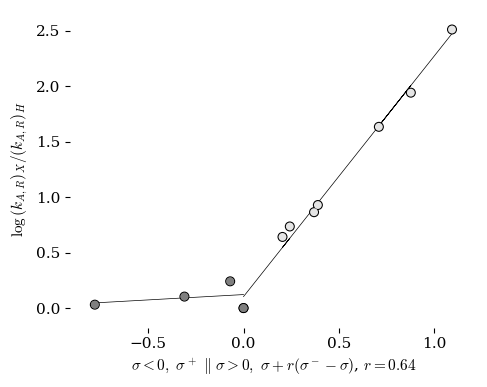

In [7]:


dfcopy = result.copy()
#display(dfcopy)
################################################
### Electron Acceptors with YK and sigma minus
################################################


df_rhs = dfcopy.drop(["p-OCH3","p-CH3","m-CH3"])

#display(df_rhs)
sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kAR_pS_11.5"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r = 0.64

#x = df_rhs[sigmatype]  
x = df_rhs["sigma"]+r*(df_rhs[sigmatype]-df_rhs["sigma"])

y = np.log10(df_rhs[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

x_label = r"$\sigma<0,\ \sigma^+\ \|\ \sigma>0,\ \sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"
y_label = r"$\log{(k_{A,R})_X/(k_{A,R})_H}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

#ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)

#ax.scatter(df_rhs["sigma"],y, color="black", marker='|', zorder=2)
#ax.scatter(df_rhs["s_minus"],y, color="black", marker='|', zorder=2)

Report(column, linfit)   # use the 'Report' function to output the line fit parameters


################################################
### Electron Donors with YK and sigma plus
################################################

df_lhs = dfcopy.drop(["p-Cl","p-Br","m-Cl","m-Br","p-CN","m-NO2","p-NO2"])






#display(df_lhs)
sigmatype = "s_plus"   # "sigma", "s_plus", or "s_minus"
column = "kAR_pS_11.5"  # "Ka", "kOH", "kH2O", "kH"

r = 1
#x = df_lhs[sigmatype]  
x = df_lhs["sigma"]+r*(df_lhs[sigmatype]-df_lhs["sigma"])

y = np.log10(df_lhs[column] / y_H)


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

#ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.5, zorder=3)

#ax.scatter(df_lhs["sigma"],y, color="black", marker='|', zorder=2)
#ax.scatter(df_lhs["s_plus"],y, color="black", marker='|', zorder=2)

Report(column, linfit)   # use the 'Report' function to output the line fit parameters



###############################################################################
fig.savefig("images/plotYK_kOH_1.pdf")   # use this to save the figure in PDF format
plt.show()


## Determine Yukawa-Tsuno *r*-Value

It would be better to use the simpler Yukawa-Tsuno equation to express the The code below uses the y-data and determines a set of $\sigma$ values based on blending $\sigma$ and $\sigma^-$ values using the Yukawa-Tsuno method.

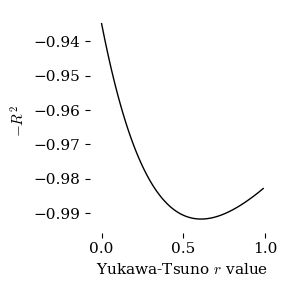

The optimal value for r is 0.609 for rsq = -0.99169


In [11]:
# YUKAWA-TSUNO DETERMINATION

################################################################################
### Define a function to be minimized
################################################################################

df = df_rhs
def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    x = df["sigma"]+r*(df["s_minus"]-df["sigma"])
    column = "kAR_pS_11.5"  # "Ka", "kOH", "kH2O", "kH" 
    y_H = df[column]["H"]
    y = np.log10(df_rhs[column] / y_H)
    linfit = linregress(x,y)    # y is the set of y values from above
    return -(linfit.rvalue**2)




##########################################################
### Calculate the value of -RSQ as the value of r is varied 
##########################################################

rsq_range=[]
r_range = np.arange(0,1,0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)

##########################################################
### Plot the value of -RSQ as the value of r is varied 
##########################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-R^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

ax.plot(r_range,rsq_range)

fig.savefig("plotIYK_Fig4_r.pdf")   # use this to save the figure in PDF format
plt.show()

##################################################
### Determine optimal r value to minimize -RSQ 
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")

## Yukawa Tsuno Plot

Below is code to produce a YK plot using the $r^-$ value determined above. The correlation is stil great and we don't have to explain any negative values for $r^+$.

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\l'
/var/folders/3h/d_p2gtjd78g8c7m6c14chsg00000gq/T/ipykernel_4926/3930006800.py:35: SyntaxWarning: invalid escape sequence '\s'
  x_label = "$\sigma^\prime,  r^- = "+str(r_minus)+"$"
/var/folders/3h/d_p2gtjd78g8c7m6c14chsg00000gq/T/ipykernel_4926/3930006800.py:36: SyntaxWarning: invalid escape sequence '\l'
  y_label = "$\log{(k_{A,R})_X/(k_{A,R})_H}$"


YK Plot
slope = 1.870 +/- 0.112
intercept = 1.409 +/- 0.058
rsq = 0.969
p = 4.33e-08



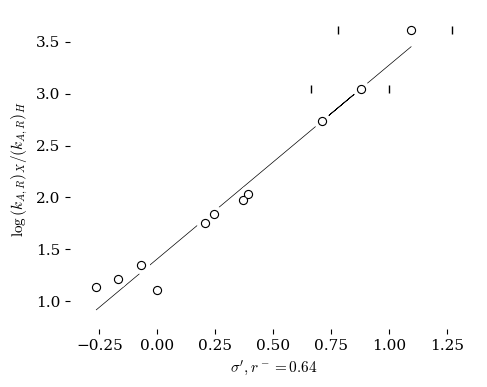

In [13]:
################################################################################
### start with a fresh copy of the data
################################################################################

df = result.copy()    # copy the result so that any changes do not affect the original data

################################################################################
### calculate apparent sigma value using the Ingold-Yukawa-Tsuno equation
################################################################################

r_plus = 0
r_minus = 0.64
x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

################################################################################
### calulate log relative rates
################################################################################

y_H = df["kAR_pS_1.0"]["H"]   # The rate constant for the unsubstituted case
y = np.log10(df["kAR_pS_11.5"]/y_H)   

################################################################################
### Create a plot object
################################################################################


style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = "$\sigma^\prime,  r^- = "+str(r_minus)+"$"
y_label = "$\log{(k_{A,R})_X/(k_{A,R})_H}$"
ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )


################################################################################
### Fit the x,y data obtained above to a line and plot the line fit
################################################################################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

################################################################################
### Plot the x,y data 
################################################################################

ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

################################################################################
### Plot extra points. here we add in points using the sigma values only for comparison purposes
################################################################################

ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=0)


################################################################################
### Print out the line fit parameters
################################################################################

Report("YK Plot", linfit)   # use the 'Report' function to output the line fit parameters

################################################################################
### Output the plot to a pdf file and show it in this notebook.
################################################################################


fig.savefig("plotYK_Fig4.pdf")   # use this to save the figure in PDF format
plt.show()


## A Fancy Hammett Plot

Below is code to produce a basic Hammett plot and line fit only the meta substituents.  These meta points are also highlighted by overplotting just those data points again in gray.

this plot is intended to highlight where the deviations are from the line with substituents that have no resonance effects.

kAR pH 1.0
slope = -1.452 +/- 0.029
intercept = -0.022 +/- 0.012
rsq = 0.999
p = 1.69e-05



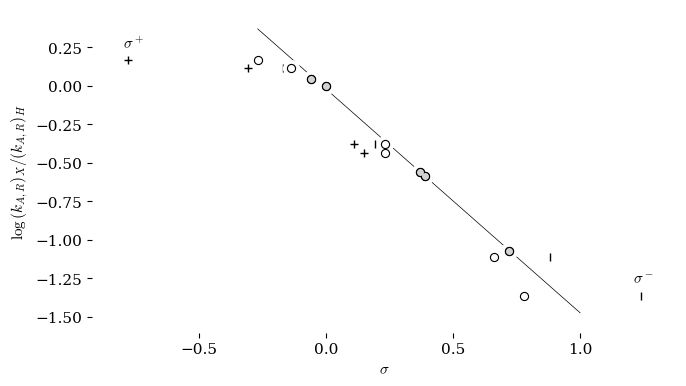

In [ ]:
### PLAIN HAMMETT PLOT

################################################################################
### start with a fresh copy of the data
################################################################################

df = result.copy()

################################################################################
### Set up x-axis with sigma values. Also define a list of x-values for plotting the line
################################################################################

x = df["sigma"]

################################################################################
### calulate log relative rates
################################################################################

y_H = df["kAR_pS_1.0"]["H"]
y = np.log10(df["kAR_pS_1.0"]/y_H)   

################################################################################
### Create a plot object
################################################################################


style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = "$\sigma$"
y_label = "$\log{(k_{A,R})_X/(k_{A,R})_H}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )

################################################################################
### Plot all the data points
################################################################################


ax.scatter(x,y, s=128, color="white", marker='o', zorder=1)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=4)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=4)

################################################################################
### Plot extra data point markers for sigma_ and sigma- values
################################################################################

#ax.scatter(df["sigma"],y, color="black", marker='|', zorder=2)
ax.scatter(df["s_minus"],y, color="black", marker='|', zorder=0)
ax.scatter(df["s_plus"],y, color="black", marker='+', zorder=3)

################################################################################
### Add text to identify the extra markers
################################################################################

ax.text(-0.80,0.25,"$\sigma^+$")
ax.text(1.21,-1.28,"$\sigma^-$")

################################################################################
### Pick out the meta substituents only
################################################################################

meta = df.loc[["m-CH3", "m-Cl", "m-Br", "m-NO2", "H"]]   # create a dataframe with only meta substituents

x_meta = meta["sigma"]
y_meta = np.log10(meta["kAR_pS_1.0"]/y_H)

################################################################################
### Plot the meta points in light gray
################################################################################

ax.scatter(x_meta,y_meta, s=128, color="white", marker='o', zorder=1)
ax.scatter(x_meta,y_meta, s=32, color="black", marker='o', zorder=4)
ax.scatter(x_meta,y_meta, s=16, color="lightgray", marker='o', zorder=4)

################################################################################
### Fit the x,y data for meta substituents and plot the line fit
################################################################################

linfit = linregress(x_meta,y_meta)

#x_line = np.linspace(np.min(x), np.max(x), 10)   # Plot the line only within the limits of the meta sigma values
x_line = np.linspace(np.min(x), 1.0, 10)          # Plot the line beyond the limits of the meta sigma values

fity = linfit.slope * x_line + linfit.intercept
ax.plot(x_line, fity, color='black', zorder=0, linewidth=0.5)

################################################################################
### get fancy and add horizontal lines to connect alternate points with hammett sigma points.
################################################################################

if False:                  # An easy switch to turn this on or off. 'True' for on, 'False' for off.
    for n in df.index:
        yhline = y[n]
        start = df["s_minus"][n]
        end = df["s_plus"][n]
        ax.hlines(yhline, start, end, color='lightgray', zorder=2, linewidth=0.5)

################################################################################
### Print out the line fit parameters
################################################################################

Report("kAR pH 1.0", linfit)   # use the 'Report' function to output the line fit parameters

################################################################################
### Output the plot to a pdf file and show it in this notebook.
################################################################################

fig.savefig("plot_Hammett_Fig13.pdf")   # use this to save the figure in PDF format
plt.show()

